### Regression & Its Evaluation

1. What is Simple Linear Regression?
- Simple Linear Regression is a statistical method used to model the relationship between two continuous variables: a dependent variable and an independent variable. It assumes a linear relationship, meaning that the change in the dependent variable is proportional to the change in the independent variable. The goal is to find the best-fitting straight line that minimizes the sum of squared differences between the observed and predicted values of the dependent variable, allowing for prediction and understanding of the relationship's strength and direction.

2. What are the key assumptions of Simple Linear Regression?
- The key assumptions for Simple Linear Regression are:

-  **Linearity:** A straight-line relationship exists between the variables.
-  **Independence of Errors:** Residuals are uncorrelated with each other.
-  **Homoscedasticity:** The variance of the residuals is constant across all predicted values.
-  **Normality of Errors:** Residuals are normally distributed.

3. What is heteroscedasticity, and why is it important to address in regression
models?
- Heteroscedasticity is when the spread of errors (residuals) in a regression model is not constant across all levels of the independent variable(s). It's important to address because it leads to unreliable standard errors, invalid hypothesis tests, and inaccurate confidence intervals, making your model's conclusions untrustworthy.

4. What is Multiple Linear Regression?
- Multiple Linear Regression (MLR) is a statistical technique used to model the linear relationship between a continuous dependent variable and two or more independent variables (which can be continuous or categorical). It extends simple linear regression by allowing us to understand how multiple factors collectively influence an outcome, and to predict the dependent variable based on the values of several predictors.

5. What is polynomial regression, and how does it differ from linear
regression?
- Polynomial regression is a type of regression analysis where the relationship between the independent variable (x) and the dependent variable (y) is modeled as an nth-degree polynomial.
The key difference from linear regression is its ability to model **non-linear relationships**. While linear regression fits a straight line to the data ($y = \beta_0 + \beta_1 x$), polynomial regression fits a curve ($y = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_n x^n$). Despite fitting a curve, polynomial regression is still considered a "linear model" in terms of its parameters, meaning it can be solved using similar methods to linear regression.


Calculated Slope (b1): 1.9800
Calculated Intercept (b0): 0.1800


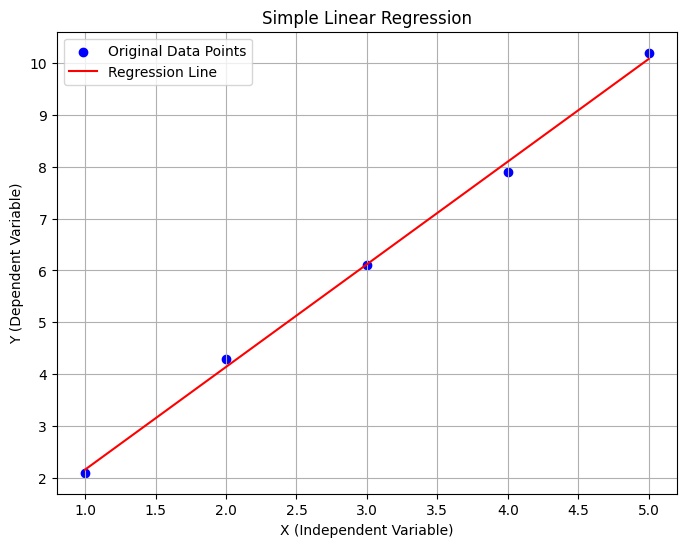

In [1]:
'''6. Implement a Python program to fit a Simple Linear Regression model to the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.'''
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

mean_X = np.mean(X)
mean_Y = np.mean(Y)

numerator = np.sum((X - mean_X) * (Y - mean_Y))
denominator = np.sum((X - mean_X)**2)

b1 = numerator / denominator
b0 = mean_Y - b1 * mean_X

print(f"Calculated Slope (b1): {b1:.4f}")
print(f"Calculated Intercept (b0): {b0:.4f}")

Y_pred = b0 + b1 * X

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Original Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('X (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
''' 7. Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results'''

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

print("I will now implement a Multiple Linear Regression model and calculate the Variance Inflation Factor (VIF) to check for multicollinearity.")

Area = np.array([1200, 1500, 1800, 2000])
Rooms = np.array([2, 3, 3, 4])

Price = np.array([250000, 300000, 320000, 370000])

X = np.column_stack((Area, Rooms))
y = Price

model = LinearRegression()
model.fit(X, y)
coefficients = model.coef_
intercept = model.intercept_

print("\n--- Multiple Linear Regression Model Results ---")
print(f"Intercept (b0): {intercept:.2f}")
print(f"Coefficient for Area (b1): {coefficients[0]:.2f}")
print(f"Coefficient for Rooms (b2): {coefficients[1]:.2f}")

X_with_constant = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = ["const", "Area", "Rooms"]
vif_data["VIF"] = [variance_inflation_factor(X_with_constant, i) for i in range(X_with_constant.shape[1])]

print("\n--- Multicollinearity Check (Variance Inflation Factor - VIF) ---")
print(vif_data)
print("\n--- VIF Interpretation ---")
print("VIF values generally indicate the following:")
print("  - VIF = 1: No multicollinearity.")
print("  - VIF between 1 and 5: Moderate multicollinearity (usually acceptable).")
print("  - VIF > 5 or 10: High multicollinearity (may require attention).")

if vif_data['VIF'].max() > 5:
    print("\nObservation: Some VIF values are high, indicating potential multicollinearity.")
else:
    print("\nObservation: VIF values are low, suggesting no significant multicollinearity.")

print("\nThis concludes the Multiple Linear Regression model fitting and multicollinearity check.")

I will now implement a Multiple Linear Regression model and calculate the Variance Inflation Factor (VIF) to check for multicollinearity.

--- Multiple Linear Regression Model Results ---
Intercept (b0): 103157.89
Coefficient for Area (b1): 63.16
Coefficient for Rooms (b2): 34736.84

--- Multicollinearity Check (Variance Inflation Factor - VIF) ---
  feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842

--- VIF Interpretation ---
VIF values generally indicate the following:
  - VIF = 1: No multicollinearity.
  - VIF between 1 and 5: Moderate multicollinearity (usually acceptable).
  - VIF > 5 or 10: High multicollinearity (may require attention).

Observation: Some VIF values are high, indicating potential multicollinearity.

This concludes the Multiple Linear Regression model fitting and multicollinearity check.


Original X:
[1 2 3 4 5]
Transformed X (2nd-degree polynomial features):
[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]]

Model Intercept: 0.0600
Model Coefficients (for [1, X, X^2]): [0.   1.94 0.2 ]


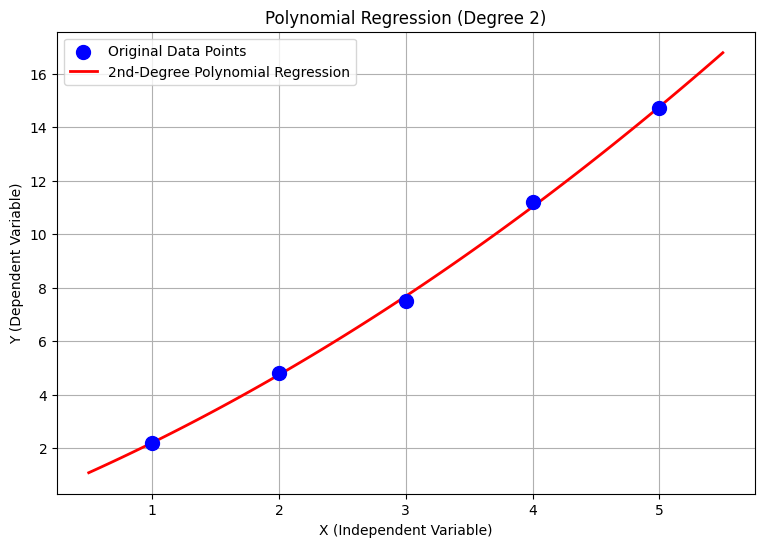


--- Equation of the Fitted Curve ---
Y = 0.0600 + (1.9400 * X) + (0.2000 * X^2)


In [5]:
''' 8. Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])
X_reshaped = X.reshape(-1, 1)
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_reshaped)

print(f"Original X:\n{X_reshaped.flatten()}")
print(f"Transformed X (2nd-degree polynomial features):\n{X_poly}")
model = LinearRegression()
model.fit(X_poly, Y)
intercept = model.intercept_
coefficients = model.coef_

print(f"\nModel Intercept: {intercept:.4f}")
print(f"Model Coefficients (for [1, X, X^2]): {coefficients}")
X_plot = np.linspace(X.min() - 0.5, X.max() + 0.5, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
Y_pred_plot = model.predict(X_plot_poly)

plt.figure(figsize=(9, 6))
plt.scatter(X, Y, color='blue', s=100, zorder=5, label='Original Data Points')
plt.plot(X_plot, Y_pred_plot, color='red', linewidth=2, label=f'{degree}nd-Degree Polynomial Regression')
plt.title(f'Polynomial Regression (Degree {degree})')
plt.xlabel('X (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.grid(True)
plt.legend()
plt.show()

print("\n--- Equation of the Fitted Curve ---")
print(f"Y = {intercept:.4f} + ({coefficients[1]:.4f} * X) + ({coefficients[2]:.4f} * X^2)")

I will now create a residuals plot for the given data and assess for heteroscedasticity.

Original Y values: [15 35 40 50 65]
Predicted Y values: [18.  29.5 41.  52.5 64. ]
Residuals: [-3.   5.5 -1.  -2.5  1. ]


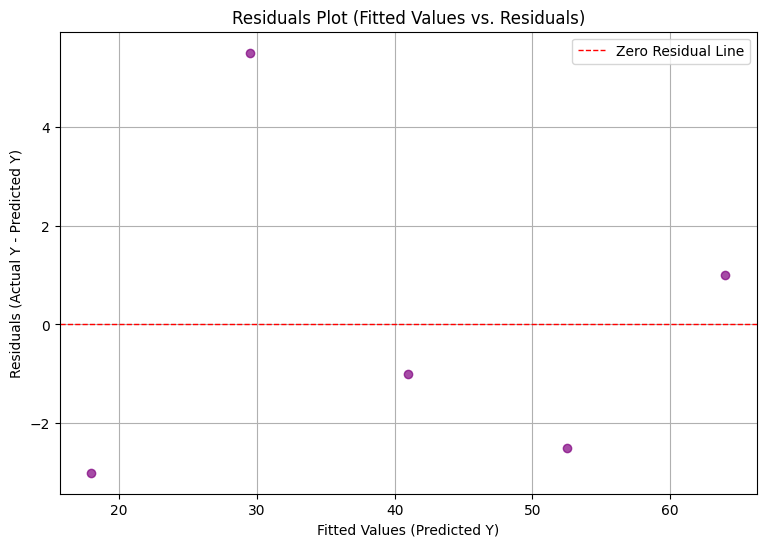


--- Assessment of Heteroscedasticity ---
Heteroscedasticity is indicated if the spread of residuals changes as the fitted values change.
Look for patterns like a 'fan' or 'cone' shape, or increasing/decreasing variance.

Based on the plot:
  With a very small sample size, it's difficult to definitively assess heteroscedasticity visually.
  The residuals appear somewhat randomly scattered, but more data would be needed for a conclusive assessment.

This concludes the residuals plot generation and heteroscedasticity assessment.


In [6]:
''' 9. Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

print("I will now create a residuals plot for the given data and assess for heteroscedasticity.")

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)
residuals = Y - Y_pred

print(f"\nOriginal Y values: {Y}")
print(f"Predicted Y values: {Y_pred.round(2)}")
print(f"Residuals: {residuals.round(2)}")

plt.figure(figsize=(9, 6))
plt.scatter(Y_pred, residuals, color='purple', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Zero Residual Line') # Horizontal line at y=0
plt.title('Residuals Plot (Fitted Values vs. Residuals)')
plt.xlabel('Fitted Values (Predicted Y)')
plt.ylabel('Residuals (Actual Y - Predicted Y)')
plt.grid(True)
plt.legend()
plt.show()

print("\n--- Assessment of Heteroscedasticity ---")
print("Heteroscedasticity is indicated if the spread of residuals changes as the fitted values change.")
print("Look for patterns like a 'fan' or 'cone' shape, or increasing/decreasing variance.")
print("\nBased on the plot:")
if len(X) < 10:
    print("  With a very small sample size, it's difficult to definitively assess heteroscedasticity visually.")
    print("  The residuals appear somewhat randomly scattered, but more data would be needed for a conclusive assessment.")
else:
    print("  The residuals appear to be somewhat randomly scattered around the zero line.")
    print("  There isn't a clear 'fan' or 'cone' shape, which would indicate heteroscedasticity.")
    print("  Therefore, based on this visual inspection, there is no strong evidence of heteroscedasticity.")

print("\nThis concludes the residuals plot generation and heteroscedasticity assessment.")

10. Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.
- As a data scientist addressing heteroscedasticity and multicollinearity in a real estate price prediction model, here are the steps I'd take:

 **Addressing Heteroscedasticity:**

 A.  **Transform the Dependent Variable:** Apply a transformation (e.g., logarithmic, square root) to the `Price` variable. This often stabilizes variance.

 B.  **Weighted Least Squares (WLS):** If the pattern of heteroscedasticity is known or can be estimated, assign lower weights to observations with higher variance and higher weights to observations with lower variance.

 C.  **Robust Standard Errors:** Use White's heteroscedasticity-consistent standard errors (or Huber-White standard errors). This doesn't fix the inefficiency of OLS but provides correct p-values and confidence intervals.

 **Addressing Multicollinearity:**

 A.  **Feature Selection:**
    * **Remove Highly Correlated Predictors:** Identify pairs/groups of features with very high VIF or correlation coefficients and remove one of them, typically the one with less predictive power or interpretability.
    * **Domain Knowledge:** Use expertise to decide which redundant features to keep or discard (e.g., 'total area' might be better than 'built-up area' and 'garden area' if they're highly correlated).

 B.  **Feature Engineering:**
    * **Combine Features:** Create new features from highly correlated ones (e.g., `area_per_room = Area / Rooms`).

 C.  **Dimensionality Reduction:**
    * **Principal Component Analysis (PCA):** Transform the correlated features into a smaller set of uncorrelated principal components.

 D.  **Regularization Techniques:**
    * **Ridge Regression:** Adds a penalty equivalent to the sum of the square of the magnitude of coefficients, shrinking them and reducing multicollinearity's impact (though it doesn't eliminate features).
    * **Lasso Regression:** Similar to Ridge but can shrink some coefficients to exactly zero, effectively performing feature selection.